# Capstone: Analysis of tennis tournament data for ATP and WTA
Data from https://github.com/JeffSackmann

In [3]:
!head atp-data/atp_players.csv

100001,Gardnar,Mulloy,R,19131122,USA
100002,Pancho,Segura,R,19210620,ECU
100003,Frank,Sedgman,R,19271002,AUS
100004,Giuseppe,Merlo,R,19271011,ITA
100005,Richard Pancho,Gonzales,R,19280509,USA
100006,Grant,Golden,R,19290821,USA
100007,Abe,Segal,L,19301023,RSA
100008,Kurt,Nielsen,R,19301119,DEN
100009,Istvan,Gulyas,R,19311014,HUN
100010,Luis,Ayala,R,19320918,CHI


In [4]:
!head atp-data/atp_matches_qual_chall_2010.csv

tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
2010-5059,Curitiba CH,Clay,32,C,20100419,1,103999,5,,Thiago Alves,R,178,BRA,27.909650924,126,410,105149,,,Reda El Amrani,R,185,MAR,21.916495551,213,215,6-4 3-6 7-5,3,R32,134,7,1,95,67,44,17,15,8,11,18,10,112,60,44,25,16,12,16
2010-5059,Curitiba CH,Clay,32,C,20100419,2,104122,,,Carlos Berlocq,R,183,ARG,27.2060232717,204,223,104311,,,Leonardo Tavares,R,,POR,26.160164271,248,185,2-6 6-3 6-2,3,R32,120,12,3,92,57,44,14,13,8,10,1,1,71,43,29,14,12,7,10
2010-5059,Curitiba CH,Clay,32,C,20100419,3,103454,1,,Nicolas Mass

In [5]:
!head atp-data/atp_rankings_10s.csv

20100104,1,103819,10550
20100104,2,104745,9205
20100104,3,104925,8310
20100104,4,104918,7030
20100104,5,105223,6785
20100104,6,103786,4930
20100104,7,104053,4410
20100104,8,104417,3410
20100104,9,104269,3300
20100104,10,104542,2875


## Questions
1) Compare Results of ATP and WTA data  
2) How often is some player able to win game when losing first set (ATP vs WTA)  
3) How often is this true for top 10, top 20 players (how to define them?)  
4) How much does a longer game favor a younger player/ a player that is 10+ places higher in ranking  
5) Are there differences playing on different surfaces (clay, lawn, hard court)?  


In [116]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144


In [195]:

players = pd.read_csv('atp-data/atp_players.csv', header=None,names = ["playerId", "first_name", "last_name", "hand",'birthdate','nationality'])
players.head()

,playerId,first_name,last_name,hand,birthdate,nationality
0,100001,Gardnar,Mulloy,R,19131122.0,USA
1,100002,Pancho,Segura,R,19210620.0,ECU
2,100003,Frank,Sedgman,R,19271002.0,AUS
3,100004,Giuseppe,Merlo,R,19271011.0,ITA
4,100005,Richard Pancho,Gonzales,R,19280509.0,USA


In [73]:
players[players['LastName']=='Federer']

,PlayerId,FirstName,LastName,Hand,Birthdate,Nationality
3818,103819,Roger,Federer,R,19810808.0,SUI


In [74]:
rankings = pd.read_csv('atp-data/atp_rankings_10s.csv', header=None,names = ["date", "position", "playerId", "points"])
rankings.head()

,Date,Position,PlayerId,Points
0,20100104,1,103819.0,10550
1,20100104,2,104745.0,9205
2,20100104,3,104925.0,8310
3,20100104,4,104918.0,7030
4,20100104,5,105223.0,6785


In [79]:

atp_matches = pd.read_csv('atp-data/atp_matches_2015.csv',dtype={'playerId': np.int32},parse_dates=True)
atp_matches.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2015-329,Tokyo,Hard,32,A,20151005,1,104527,1.0,NaN,...,1.0,2.0,2.0,71.0,46.0,33.0,10.0,10.0,2.0,5.0
1,2015-329,Tokyo,Hard,32,A,20151005,2,105147,NaN,WC,...,14.0,1.0,4.0,96.0,52.0,25.0,23.0,13.0,12.0,19.0
2,2015-329,Tokyo,Hard,32,A,20151005,3,105572,NaN,Q,...,7.0,15.0,7.0,128.0,74.0,60.0,27.0,18.0,9.0,11.0
3,2015-329,Tokyo,Hard,32,A,20151005,4,105311,NaN,NaN,...,6.0,9.0,5.0,85.0,42.0,27.0,21.0,13.0,4.0,8.0
4,2015-329,Tokyo,Hard,32,A,20151005,5,104468,3.0,NaN,...,6.0,0.0,5.0,61.0,33.0,24.0,10.0,10.0,1.0,5.0


In [80]:
atp_matches.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'winner_rank', 'winner_rank_points', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'loser_rank', 'loser_rank_points', 'score', 'best_of',
       'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced'],
      dtype='object')

In [81]:
atp_matches['draw_size'] = atp_matches['draw_size'].dropna().astype('int')
atp_matches.dtypes

tourney_id             object
tourney_name           object
surface                object
draw_size               int64
tourney_level          object
tourney_date            int64
match_num               int64
winner_id               int64
winner_seed           float64
winner_entry           object
winner_name            object
winner_hand            object
winner_ht             float64
winner_ioc             object
winner_age            float64
winner_rank           float64
winner_rank_points    float64
loser_id                int64
loser_seed            float64
loser_entry            object
loser_name             object
loser_hand             object
loser_ht              float64
loser_ioc              object
loser_age             float64
loser_rank            float64
loser_rank_points     float64
score                  object
best_of                 int64
round                  object
minutes               float64
w_ace                 float64
w_df                  float64
w_svpt    

In [109]:
atp_matches.loc[0]

tourney_id                      2015-329
tourney_name                       Tokyo
surface                             Hard
draw_size                             32
tourney_level                          A
tourney_date                    20151005
match_num                              1
winner_id                         104527
winner_seed                            1
winner_entry                         NaN
winner_name           Stanislas Wawrinka
winner_hand                            R
winner_ht                            183
winner_ioc                           SUI
winner_age                            30
winner_rank                            4
winner_rank_points                  6005
loser_id                          103285
loser_seed                           NaN
loser_entry                           PR
loser_name                Radek Stepanek
loser_hand                             R
loser_ht                             185
loser_ioc                            CZE
loser_age       

In [110]:
atp_matches['winner_hand'] = atp_matches['winner_hand'].astype('category')
atp_matches['loser_hand'] = atp_matches['loser_hand'].astype('category')
atp_matches['tourney_date'] = pd.to_datetime(atp_matches['tourney_date'])


In [90]:
print(atp_matches.columns)
print(atp_matches.dtypes)

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'winner_rank', 'winner_rank_points', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'loser_rank', 'loser_rank_points', 'score', 'best_of',
       'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced'],
      dtype='object')
tourney_id              object
tourney_name            object
surface                 object
draw_size                int64
tourney_level           object
tourney_date             int64
match_num                int64
winner_id                int64
winner_seed            floa

In [233]:
atp_small = atp_matches[['tourney_name','surface','winner_name','winner_hand','winner_age','winner_seed','loser_name','loser_hand','loser_age','loser_seed','score','minutes']]
print(atp_small.head())

  tourney_name surface         winner_name winner_hand  winner_age  \
0        Tokyo    Hard  Stanislas Wawrinka           R          30   
1        Tokyo    Hard         Tatsuma Ito           R          27   
2        Tokyo    Hard     Austin Krajicek           L          25   
3        Tokyo    Hard          Joao Sousa           R          26   
4        Tokyo    Hard        Gilles Simon           R          30   

   winner_seed          loser_name loser_hand  loser_age  loser_seed  \
0          1.0      Radek Stepanek          R  36.854209         NaN   
1          NaN  Yoshihito Nishioka          L  20.021903         NaN   
2          NaN       Matthew Ebden          R  27.857632         NaN   
3          NaN     Feliciano Lopez          L  34.039699         7.0   
4          3.0     Mikhail Youzhny          R  33.278576         NaN   

               score  minutes  
0            7-5 6-3      NaN  
1        3-6 6-0 7-5      NaN  
2  5-7 7-6(4) 7-6(5)      NaN  
3        6-4 4-6 6

In [247]:
atp_xs = atp_matches[['winner_name','loser_name','score','minutes','surface','winner_hand','winner_age','loser_hand','loser_age']]
atp_xs.head()

,winner_name,loser_name,score,minutes,surface,winner_hand,winner_age,loser_hand,loser_age
0,Stanislas Wawrinka,Radek Stepanek,7-5 6-3,NaN,Hard,R,30,R,36.854209
1,Tatsuma Ito,Yoshihito Nishioka,3-6 6-0 7-5,NaN,Hard,R,27,L,20.021903
2,Austin Krajicek,Matthew Ebden,5-7 7-6(4) 7-6(5),NaN,Hard,L,25,R,27.857632
3,Joao Sousa,Feliciano Lopez,6-4 4-6 6-1,NaN,Hard,R,26,L,34.039699
4,Gilles Simon,Mikhail Youzhny,6-4 6-4,NaN,Hard,R,30,R,33.278576


In [242]:
atp_xs[pd.notnull(atp_xs['minutes'])].groupby(['minutes']).size()

minutes
8.0      1
10.0     1
16.0     1
19.0     1
20.0     1
21.0     3
22.0     1
23.0     1
24.0     1
26.0     3
28.0     2
32.0     1
36.0     2
38.0     1
40.0     1
41.0     1
42.0     1
43.0     2
46.0     1
47.0     2
48.0     1
49.0     4
50.0     1
51.0     3
52.0     2
53.0     8
54.0     6
55.0     6
56.0     9
57.0     6
        ..
197.0    1
198.0    1
199.0    1
200.0    1
202.0    3
203.0    1
206.0    2
207.0    2
208.0    4
209.0    1
210.0    1
211.0    2
212.0    1
213.0    1
214.0    1
215.0    2
216.0    1
217.0    2
219.0    1
225.0    2
226.0    1
227.0    2
231.0    1
235.0    1
242.0    1
247.0    1
248.0    1
249.0    1
250.0    1
252.0    1
dtype: int64

In [254]:
minutes = atp_xs[pd.notnull(atp_xs['minutes'])][['minutes','surface']]
#minutes.plot.hist(bins=20, alpha=0.5)
minutes["surface"] = minutes["surface"].astype('category')
minutes["surface"].describe()

count     1351
unique       2
top       Hard
freq       687
Name: surface, dtype: object

In [257]:
minutes["surface"][minutes["surface"]!="Clay"].head()

579    Hard
580    Hard
581    Hard
582    Hard
583    Hard
Name: surface, dtype: category
Categories (2, object): [Clay, Hard]

In [259]:
atp_xs[atp_xs['surface']=="Grass"].head()

,winner_name,loser_name,score,minutes,surface,winner_hand,winner_age,loser_hand,loser_age
316,Novak Djokovic,Philipp Kohlschreiber,6-4 6-4 6-4,NaN,Grass,R,28,R,31.701574
317,Jarkko Nieminen,Lleyton Hewitt,3-6 6-3 4-6 6-0 11-9,NaN,Grass,L,33,R,34.340862
318,Pierre Hugues Herbert,Hyeon Chung,1-6 6-2 3-6 6-2 10-8,NaN,Grass,R,24,U,19.110198
319,Bernard Tomic,Jan Lennard Struff,6-3 3-6 2-6 6-2 6-3,NaN,Grass,R,22,R,25.177276
320,Leonardo Mayer,Thanasi Kokkinakis,7-6(7) 7-6(3) 6-4,NaN,Grass,R,28,R,19.216975


/Users/robertseidl/anaconda/envs/datascience/lib/python3.5/site-packages/pandas/tools/plotting.py:3082: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


                  minutes
surface                  
Clay    count  664.000000
        mean   106.103916
        std     39.405955
        min     10.000000
        25%     77.750000
        50%     98.000000
        75%    129.000000
        max    250.000000
Hard    count  687.000000
        mean   104.011645
        std     38.220282
        min      8.000000
        25%     76.000000
        50%     97.000000
        75%    126.000000
        max    252.000000


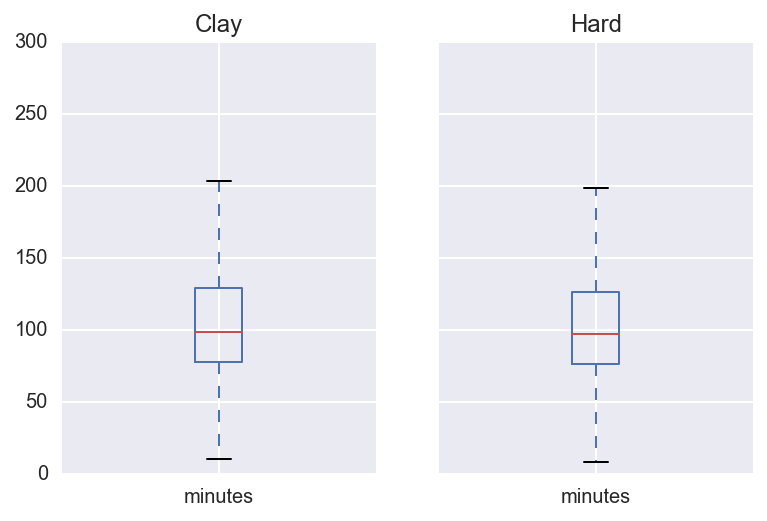

In [286]:
grouped = minutes.groupby('surface')
grouped.boxplot()
print(grouped.describe())

In [338]:
grouped2 = atp_xs[['surface','winner_hand','minutes']].groupby(['surface','winner_hand'])
print(grouped2.describe())

/Users/robertseidl/anaconda/envs/datascience/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


                              minutes
surface winner_hand                  
Clay    L           count  106.000000
                    mean   103.933962
                    std     35.530341
                    min     26.000000
                    25%           NaN
                    50%           NaN
                    75%           NaN
                    max    250.000000
        R           count  552.000000
                    mean   106.418478
                    std     40.203573
                    min     10.000000
                    25%           NaN
                    50%           NaN
                    75%           NaN
                    max    249.000000
        U           count    6.000000
                    mean   115.500000
                    std     32.537670
                    min     83.000000
                    25%           NaN
                    50%           NaN
                    75%           NaN
                    max    176.000000
Grass   L   

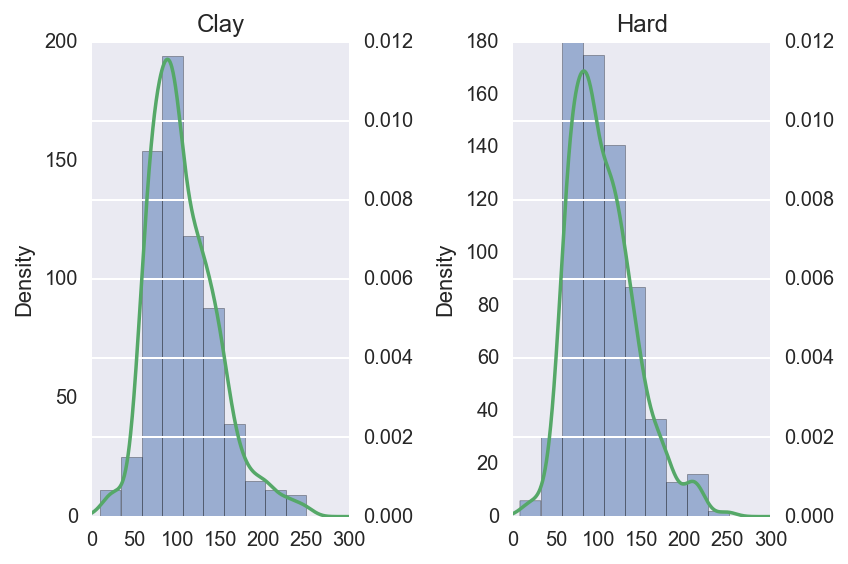

In [328]:
fig, axes = plt.subplots(1, 2)
print(axes)

for index,group in enumerate(grouped):
    ax = axes[index]
    group[1]['minutes'].plot.hist(alpha=0.5, ax=ax)
    ax2 = group[1]['minutes'].plot.kde(ax=ax, secondary_y=True, title=group[0])
    ax2.set_ylim(0)
    ax2.set_xlim(0,300)

fig.tight_layout()

In [334]:
atp_xs[atp_xs['surface']=="Clay"].sort_values(by="minutes", ascending=False).head()

,winner_name,loser_name,score,minutes,surface,winner_hand,winner_age,loser_hand,loser_age
2513,Andrea Arnaboldi,James Duckworth,4-6 6-7(5) 7-6(4) 7-6(2) 6-0,250.0,Clay,L,27,R,23.340178
2612,Novak Djokovic,Andy Murray,6-3 6-3 5-7 5-7 6-1,249.0,Clay,R,28,R,28.027379
2493,Carlos Berlocq,Illya Marchenko,4-6 3-6 6-3 7-5 6-2,248.0,Clay,R,32,R,27.709788
2489,Gilles Muller,Paolo Lorenzi,4-6 4-6 7-6(1) 7-6(5) 6-4,242.0,Clay,L,32,R,33.440110
2515,Leonardo Mayer,Jiri Vesely,3-6 7-6(6) 6-3 5-7 6-2,235.0,Clay,R,28,L,21.872690


In [333]:
atp_xs[atp_xs['surface']=="Hard"].sort_values(by="minutes", ascending=False).head()

,winner_name,loser_name,score,minutes,surface,winner_hand,winner_age,loser_hand,loser_age
1517,Rafael Nadal,Tim Smyczek,6-2 3-6 6-7(2) 6-3 7-5,252.0,Hard,L,28,R,27.055441
1469,Thanasi Kokkinakis,Ernests Gulbis,5-7 6-0 1-6 7-6(2) 8-6,247.0,Hard,R,18,R,26.387406
1472,James Duckworth,Blaz Kavcic,6-2 5-7 7-6(7) 3-6 6-2,225.0,Hard,R,22,R,27.876797
1556,Novak Djokovic,Andy Murray,7-6(5) 6-7(4) 6-3 6-0,219.0,Hard,R,27,R,27.682409
1532,David Ferrer,Gilles Simon,6-2 7-5 5-7 7-6(4),217.0,Hard,R,32,R,30.061602


In [ ]:
atp_xs.sort_values(by="minutes", ascending=False).head()

In [301]:
atp_matches['winner_age'] = atp_matches['winner_age'].dropna().astype(int)
atp_xs['winner_age'].head()

0    30
1    27
2    25
3    26
4    30
Name: winner_age, dtype: int64

winner_hand
L     405
R    2444
U     104
dtype: int64


winner_hand
L    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
R    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
U    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
dtype: object

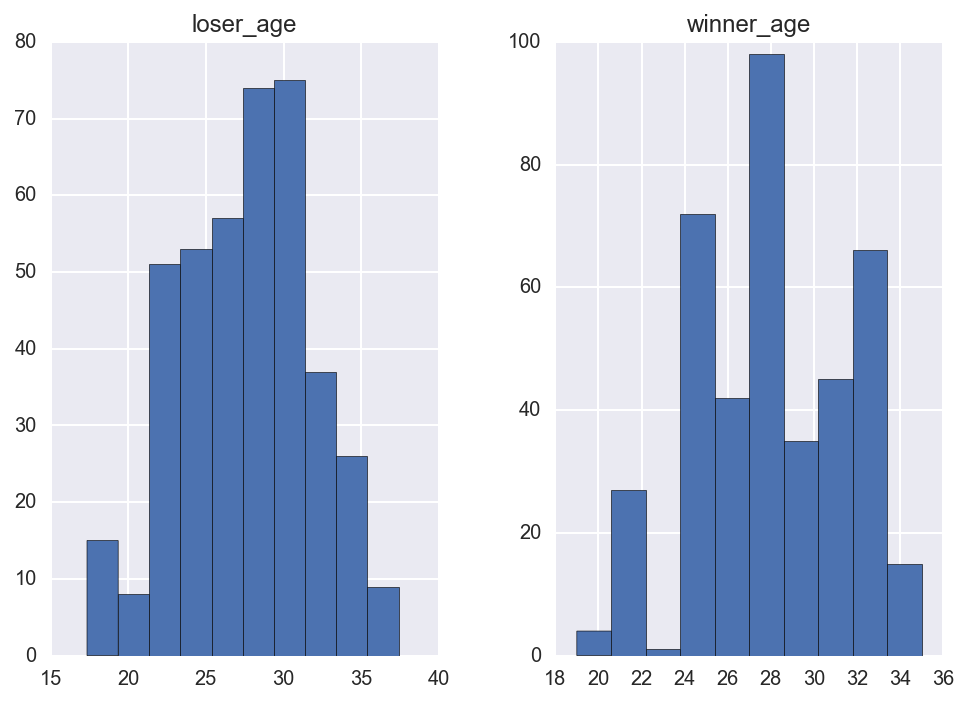

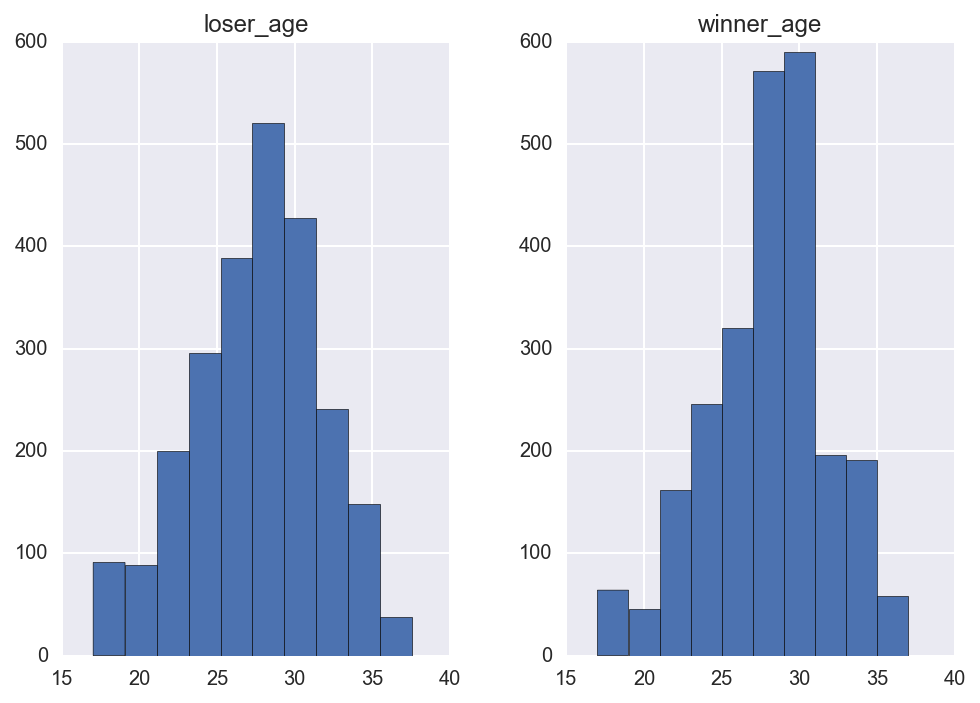

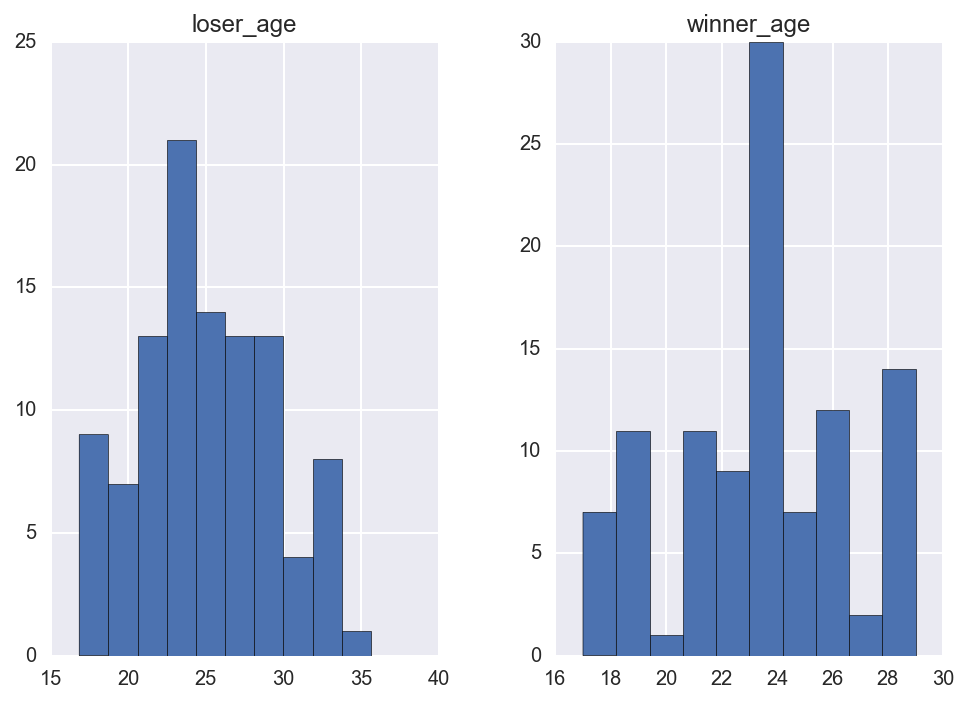

In [108]:
atp_xs.head(10)
print(atp_xs.groupby('winner_hand').size())
atp_xs.groupby('winner_hand').hist()

In [88]:
atp_xs[atp_xs['winner_name']=='Roger Federer']

,winner_name,loser_name,score,winner_hand,winner_age,loser_hand,loser_age
124,Roger Federer,Roberto Bautista Agut,6-4 6-4,R,34.023272,R,27.340178
132,Roger Federer,Kevin Anderson,6-1 6-1,R,34.023272,R,29.248460
136,Roger Federer,Feliciano Lopez,6-3 6-4,R,34.023272,L,33.905544
138,Roger Federer,Andy Murray,6-4 7-6(6),R,34.023272,R,28.257358
139,Roger Federer,Novak Djokovic,7-6(1) 6-3,R,34.023272,R,28.238193
222,Roger Federer,Andreas Seppi,6-1 6-1,R,34.234086,R,31.696099
301,Roger Federer,Jarkko Nieminen,6-2 7-5,R,33.716632,L,33.760438
309,Roger Federer,Daniel Gimeno Traver,7-6(3) 6-7(5) 6-3,R,33.716632,R,29.719370
313,Roger Federer,Diego Sebastian Schwartzman,2-6 6-2 7-5,R,33.716632,R,22.694045
315,Roger Federer,Pablo Cuevas,6-3 7-6(11),R,33.716632,R,29.316906


In [112]:
atp_xs.groupby(['winner_hand']).size()

winner_hand
L     405
R    2444
U     104
dtype: int64

surface
Clay      928
Grass     328
Hard     1702
dtype: int64


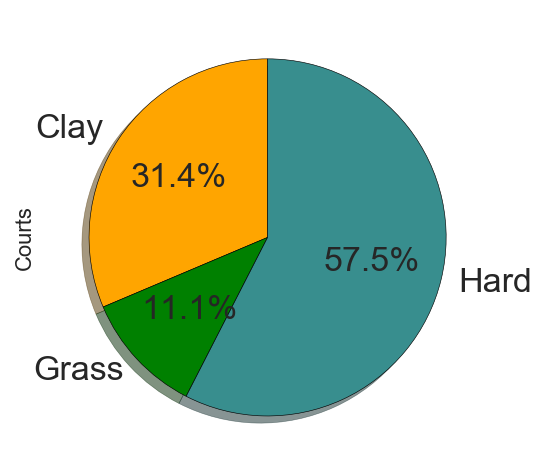

In [134]:
print(atp_small.groupby(['surface']).size())

fig = plt.figure(figsize=(4,4), dpi=200)
ax = plt.subplot(111)

atp_small.groupby(['surface']).size().plot(kind='pie', ax=ax, autopct='%1.1f%%', shadow=True, startangle=90, fontsize=17,colors=('#ffa500','g','#388E8E'))
ax.set_ylabel('Courts')

hand
A       1
L     964
R    7497
dtype: int64


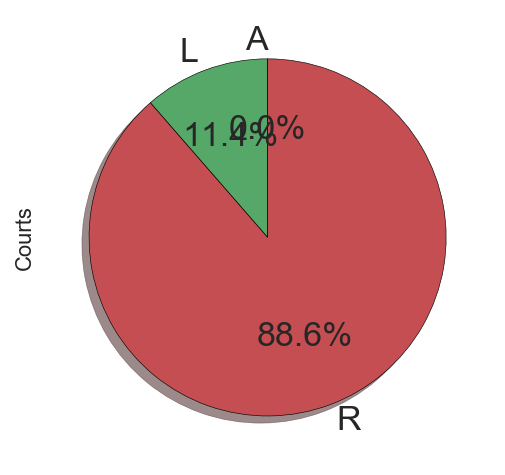

In [232]:
fig = plt.figure(figsize=(4,4), dpi=200)
ax = plt.subplot(111)

players.groupby(['hand']).size().plot(kind='pie', ax=ax, autopct='%1.1f%%', shadow=True, startangle=90, fontsize=17)
ax.set_ylabel('Courts')


print(players.groupby(['hand']).size())


In [190]:
players[pd.notnull(players['Birthdate'])][:50]
players[players['Birthdate']>19800000].sort_values('Birthdate').head(20)

,PlayerId,FirstName,LastName,Hand,Birthdate,Nationality
31145,131161,Christopher,Mcrae,U,19800101.0,USA
50598,205564,Abbas,Jaber,U,19800101.0,CIV
23102,123118,Tomasz,Romanowski,U,19800101.0,POL
18508,118524,Marek,Granec,U,19800102.0,SVK
8979,108994,Andrew,Park,R,19800102.0,USA
8776,108791,Oskars,Vaskis,R,19800102.0,LAT
9043,109058,Narciso,Reyes Rygh,R,19800103.0,ESP
29239,129255,Marc,Castellana,R,19800103.0,FRA
49532,204498,Marko,Toic,U,19800103.0,CRO
17798,117814,Roberto,Fernandez,U,19800103.0,MEX


In [198]:
players = players[pd.notnull(players['birthdate'])]#
players = players[players['birthdate']>19800000]
players['birthdate'] = players['birthdate'].astype(str).apply(lambda x: pd.to_datetime(x[:4], format='%Y'))
players[['birthdate']].head()
#pd.to_datetime(x[:-2], format='%Y%m%d')


TypeError: invalid type comparison

In [199]:
players.head()

,playerId,first_name,last_name,hand,birthdate,nationality
643,100644,Alexander,Zverev,R,1997-01-01,GER
3485,103486,Benjamin,Ebrahimzadeh,R,1980-01-01,GER
3486,103487,Federico,Luzzi,R,1980-01-01,ITA
3487,103488,Carl Henrik,Hansen,R,1980-01-01,SWE
3488,103489,Nathan,Zeder,R,1980-01-01,USA


In [202]:
players = players[players['hand'] != 'U']
print(players.groupby(['hand']).size())

players.head()

hand
A       1
L     964
R    7497
dtype: int64


,playerId,first_name,last_name,hand,birthdate,nationality
643,100644,Alexander,Zverev,R,1997-01-01,GER
3485,103486,Benjamin,Ebrahimzadeh,R,1980-01-01,GER
3486,103487,Federico,Luzzi,R,1980-01-01,ITA
3487,103488,Carl Henrik,Hansen,R,1980-01-01,SWE
3488,103489,Nathan,Zeder,R,1980-01-01,USA


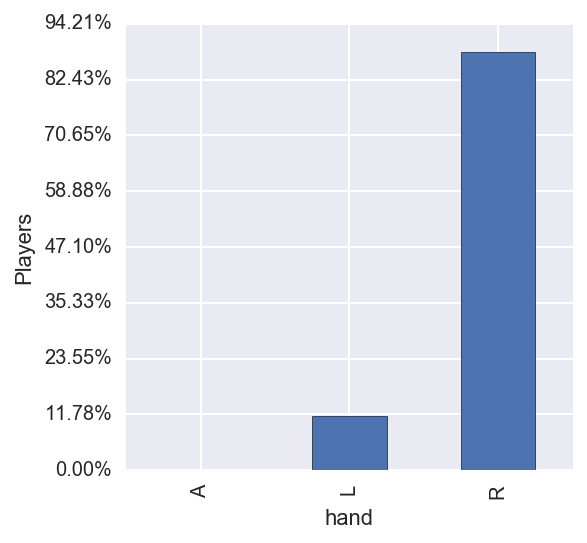

In [212]:
fig = plt.figure(figsize=(4,4), dpi=200)
ax = plt.subplot(111)

players.groupby(['hand']).size().plot(kind='bar', ax=ax)
ax.set_ylabel('Players')

# manipulate
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100/len(players)) for x in vals])

In [213]:
players[players['hand']=='A']
# AMBIDEXTROUS: Beidhaendig

,playerId,first_name,last_name,hand,birthdate,nationality
26080,126096,Charles,Minc,A,1993-01-01,FRA


In [221]:
atp_xs[atp_xs['winner_name']=='Roger Federer'].count()

winner_name    63
loser_name     63
score          63
winner_hand    63
winner_age     63
loser_hand     63
loser_age      63
dtype: int64

In [222]:
atp_xs[atp_xs['loser_name']=='Roger Federer'].count()

winner_name    11
loser_name     11
score          11
winner_hand    11
winner_age     11
loser_hand     11
loser_age      11
dtype: int64

In [223]:
atp_xs[atp_xs['loser_name']=='Roger Federer']

,winner_name,loser_name,score,winner_hand,winner_age,loser_hand,loser_age
179,Albert Ramos,Roger Federer,7-6(4) 2-6 6-3,L,27,R,34.176591
232,John Isner,Roger Federer,7-6(3) 3-6 7-6(5),R,30,R,34.234086
442,Novak Djokovic,Roger Federer,7-6(1) 6-7(10) 6-4 6-3,R,28,R,33.889117
731,Novak Djokovic,Roger Federer,6-3 6-7(5) 6-2,R,27,R,33.582478
1150,Novak Djokovic,Roger Federer,6-4 5-7 6-4 6-4,R,28,R,34.061602
1541,Andreas Seppi,Roger Federer,6-4 7-6(5) 4-6 7-6(5),R,30,R,33.448323
1899,Nick Kyrgios,Roger Federer,6-7(2) 7-6(5) 7-6(12),R,20,R,33.735797
1984,Novak Djokovic,Roger Federer,6-4 6-3,R,27,R,33.754962
2059,Gael Monfils,Roger Federer,6-4 7-6(5),R,28,R,33.678303
2611,Stanislas Wawrinka,Roger Federer,6-4 6-3 7-6(4),R,30,R,33.793292


In [224]:
atp_small[atp_small['loser_name']=='Roger Federer']

,tourney_name,surface,winner_name,winner_hand,winner_age,winner_seed,loser_name,loser_hand,loser_age,loser_seed,score
179,Shanghai Masters,Hard,Albert Ramos,L,27,NaN,Roger Federer,R,34.176591,2.0,7-6(4) 2-6 6-3
232,Paris Masters,Hard,John Isner,R,30,13.0,Roger Federer,R,34.234086,3.0,7-6(3) 3-6 7-6(5)
442,Wimbledon,Grass,Novak Djokovic,R,28,1.0,Roger Federer,R,33.889117,2.0,7-6(1) 6-7(10) 6-4 6-3
731,Indian Wells Masters,Hard,Novak Djokovic,R,27,1.0,Roger Federer,R,33.582478,2.0,6-3 6-7(5) 6-2
1150,US Open,Hard,Novak Djokovic,R,28,1.0,Roger Federer,R,34.061602,2.0,6-4 5-7 6-4 6-4
1541,Australian Open,Hard,Andreas Seppi,R,30,NaN,Roger Federer,R,33.448323,2.0,6-4 7-6(5) 4-6 7-6(5)
1899,Madrid Masters,Clay,Nick Kyrgios,R,20,NaN,Roger Federer,R,33.735797,1.0,6-7(2) 7-6(5) 7-6(12)
1984,Rome Masters,Clay,Novak Djokovic,R,27,1.0,Roger Federer,R,33.754962,2.0,6-4 6-3
2059,Monte Carlo Masters,Clay,Gael Monfils,R,28,14.0,Roger Federer,R,33.678303,2.0,6-4 7-6(5)
2611,Roland Garros,Clay,Stanislas Wawrinka,R,30,8.0,Roger Federer,R,33.793292,2.0,6-4 6-3 7-6(4)


# (Optional) Use model to predict outcome of tournaments
If the model gives a winning probability of one player vs. another then this can be used to predict the outcome of a tournament for a specific draw using e.g. monte carlo method. Simulating a lot of different outcomes gives a lot of different tournament results. An interesting question to answer might be, how this finishing distribution might change if the tournament was played on another surface.

In [347]:
tourneys = atp_small
tourneys = tourneys[~tourneys['tourney_name'].astype(str).str.startswith('Davis Cup')]
tourneys['tourney_name'].unique()

array(['Tokyo', 'Stockholm', 'Umag', 'Cincinnati Masters',
       'Shanghai Masters', 'Paris Masters', 'Barcelona', 'Istanbul',
       'Wimbledon', 'Quito', 'Canada Masters', 'Kuala Lumpur', 'Nice',
       'Rotterdam', 'Chennai', 'Indian Wells Masters', 'Miami Masters',
       'Memphis', 'Brisbane', 'Sydney', 'Bogota', 's-Hertogenbosch',
       'Halle', 'Dubai', 'US Open', 'Shenzhen', 'Bucharest', 'Vienna',
       'London', 'Rio de Janeiro', 'Newport', 'Gstaad', 'Nottingham',
       'Kitzbuhel', 'Australian Open', 'Bastad', 'Buenos Aires',
       'Acapulco', 'Valencia', 'Winston-Salem', 'Zagreb', 'Munich',
       'Washington', 'Atlanta', 'Hamburg', 'Madrid Masters',
       'Rome Masters', 'Montpellier', 'Monte Carlo Masters', 'Sao Paulo',
       'Doha', 'Casablanca', 'Moscow', 'Metz', 'Houston', 'Auckland',
       'Marseille', 'Geneva', 'Stuttgart', 'Estoril', 'St. Petersburg',
       'Beijing', 'Delray Beach', 'Basel', 'Roland Garros', 'Tour Finals',
       'Challenger Tour Finals'], 

In [353]:

print(len(tourneys['tourney_name']))
print(len(tourneys['tourney_name'].unique()))

2645
67


In [357]:
tourneys['score'].head()

0              7-5 6-3
1          3-6 6-0 7-5
2    5-7 7-6(4) 7-6(5)
3          6-4 4-6 6-1
4              6-4 6-4
Name: score, dtype: object

In [403]:
import re
sets = {}
tourneys['score'].count()
for row in tourneys['score']:
    scores = row.split()
    if scores[-1] != 'W/O':
        for i, score in enumerate(scores if scores[-1] != 'RET' else scores[:-2]):
            if "(" in score:
                score, tiebreak = re.findall('(\d*-\d*)\((\d*)\)',score)[0]
                scores[i] = score
                # print(score)
            l,r = score.split("-")
            nscore = score if int(l) > int(r) else score[::-1]
            sets[nscore] = sets.get(nscore,0) + 1
    # print(scores)
    # for score in scores:
    #    sets[score] = sets.get(score,0) + 1
    

print(sets)

{'11-9': 2, '6-2': 940, '10-8': 3, '13-11': 2, '12-10': 1, '6-1': 590, '6-0': 154, '9-7': 2, '8-6': 4, '6-4': 1670, '7-6': 1272, '7-5': 548, '6-3': 1586}


In [381]:
str = '3-6'
nscore = str if int(str[0]) > int(str[2]) else str[::-1]
print(nscore)

6-3


In [411]:
import operator
sets_sorted = sorted(sets.items(), key=operator.itemgetter(1), reverse=True)
sets_sorted

[('6-4', 1670),
 ('6-3', 1586),
 ('7-6', 1272),
 ('6-2', 940),
 ('6-1', 590),
 ('7-5', 548),
 ('6-0', 154),
 ('8-6', 4),
 ('10-8', 3),
 ('11-9', 2),
 ('13-11', 2),
 ('9-7', 2),
 ('12-10', 1)]

<Container object of 13 artists>

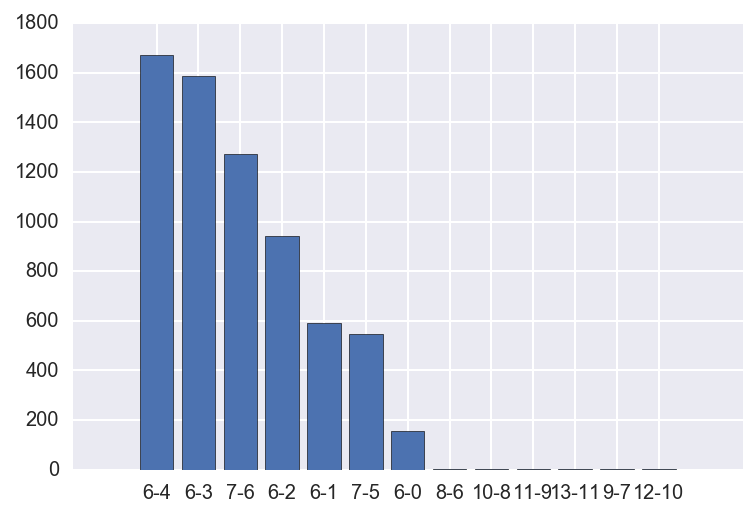

In [412]:
centers = range(len(sets_sorted))
plt.bar(centers, [set[1] for set in sets_sorted], align='center', tick_label=[set[0] for set in sets_sorted])
#plt.xlim([0, 11])
#plt.bar(sets.keys(), sets.values(), color='g')